# Etape 2  

# 1) import des packages 

In [1]:
# Bibliothèques standards
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Prétraitement des données
from sklearn.preprocessing import StandardScaler

# Modèles et pipelines
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    BayesianRidge,
    ElasticNet
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

# Évaluation et validation croisée
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    cross_val_predict,
    GridSearchCV,
    RandomizedSearchCV,
    train_test_split
)

# Métriques d'évaluation
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

# Pipelines
from sklearn.pipeline import Pipeline


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('machimachinelearning.csv')

In [4]:
pd.set_option('display.max_columns', None)
df1

Latitude  Longitude  age_de_immeuble  NumberofFloors  \
0    47.61220 -122.33799               98              12   
1    47.61317 -122.33393               29              11   
2    47.61412 -122.33664               99              10   
3    47.61390 -122.33283               99              11   
4    47.60294 -122.33263              121              15   
..        ...        ...              ...             ...   
863  47.61665 -122.33261               10              14   
864  47.62146 -122.33976               11              12   
865  47.62263 -122.33976               10              12   
866  47.62251 -122.33390               11              13   
867  47.53161 -122.29944               96               2   

     PropertyGFABuilding(s)  SecondLargestPropertyUseTypeGFA  \
0                     88434                              0.0   
1                     88502                          15064.0   
2                     61320                              0.0   
3                     83008                              0.0   
4                    163984                              0.0   
..                      ...                              ...   
863                  144614                              0.0   
864                  317442                         136594.0   
865                  317189                         147597.0   
866                  339038                         202178.0   
867                   24990                              0.0   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SourceEUIWN(kBtu/sf)  \
0                          0.000000             60.0            189.000000   
1                       4622.000000             61.0            179.399994   
2                          0.000000             56.0            224.000000   
3                          0.000000             27.0            154.699997   
4                          0.000000             43.0            187.199997   
..                              ...              ...                   ...   
863                        0.000000             89.0            105.599998   
864                        0.000000             99.0            110.000000   
865                        0.000000             98.0            117.599998   
866                     6313.200195             98.0            101.599998   
867                        0.000000              9.0            378.700012   

     SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingType_NonResidential  \
0                7456910.0             249.98                            1   
1                8664479.0             295.86                            1   
2                6946800.5             286.43                            1   
3                6062767.5             176.14                            1   
4               14194054.0             392.16                            1   
..                     ...                ...                          ...   
863              5547964.5              50.32                            1   
864             12926544.0             147.14                            1   
865             14409447.0             202.12                            1   
866             14037166.0             245.16                            0   
867              4731813.5             134.80                            1   

     BuildingType_Nonresidential COS  BuildingType_SPS-District K-12  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   
..                               ...                             ...   
863                                0                               0   
864                                0                 

In [5]:
df1.columns.to_list()

['Latitude',
 'Longitude',
 'age_de_immeuble',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'BuildingType_NonResidential',
 'BuildingType_Nonresidential COS',
 'BuildingType_SPS-District K-12',
 'LargestPropertyUseType_Courthouse',
 'LargestPropertyUseType_Data Center',
 'LargestPropertyUseType_Distribution Center',
 'LargestPropertyUseType_Financial Office',
 'LargestPropertyUseType_Hospital (General Medical & Surgical)',
 'LargestPropertyUseType_Hotel',
 'LargestPropertyUseType_K-12 School',
 'LargestPropertyUseType_Medical Office',
 'LargestPropertyUseType_Multifamily Housing',
 'LargestPropertyUseType_Non-Refrigerated Warehouse',
 'LargestPropertyUseType_Office',
 'LargestPropertyUseType_Other',
 'LargestPropertyUseType_Parking',
 'LargestPropertyUseType_Refrigerated Warehouse',
 'LargestPropertyUseType_Residence Hall/

In [6]:
# Supprimer les colonnes  de df qui ne doivent pas influencer les calcules : 
df = df1.drop(columns=['Latitude', 'Longitude', 'ENERGYSTARScore'])

# Vérifier que les colonnes ont été supprimées
print(df.shape) 


(868, 88)


# heat map 

Top 5 variables les plus corrélées avec 'SiteEnergyUseWN(kBtu)' : ['TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'LargestPropertyUseType_Hospital (General Medical & Surgical)', 'ThirdLargestPropertyUseTypeGFA']
Top 5 variables les moins corrélées avec 'SiteEnergyUseWN(kBtu)' : ['SecondLargestPropertyUseType_Convenience Store without Gas Station', 'ThirdLargestPropertyUseType_Other - Recreation', 'SecondLargestPropertyUseType_Supermarket/Grocery Store', 'SecondLargestPropertyUseType_Other - Recreation', 'LargestPropertyUseType_Supermarket/Grocery Store']

Top 5 variables les plus corrélées avec 'TotalGHGEmissions' : ['SiteEnergyUseWN(kBtu)', 'LargestPropertyUseType_Hospital (General Medical & Surgical)', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)']
Top 5 variables les moins corrélées avec 'TotalGHGEmissions' : ['ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)', 'SecondL

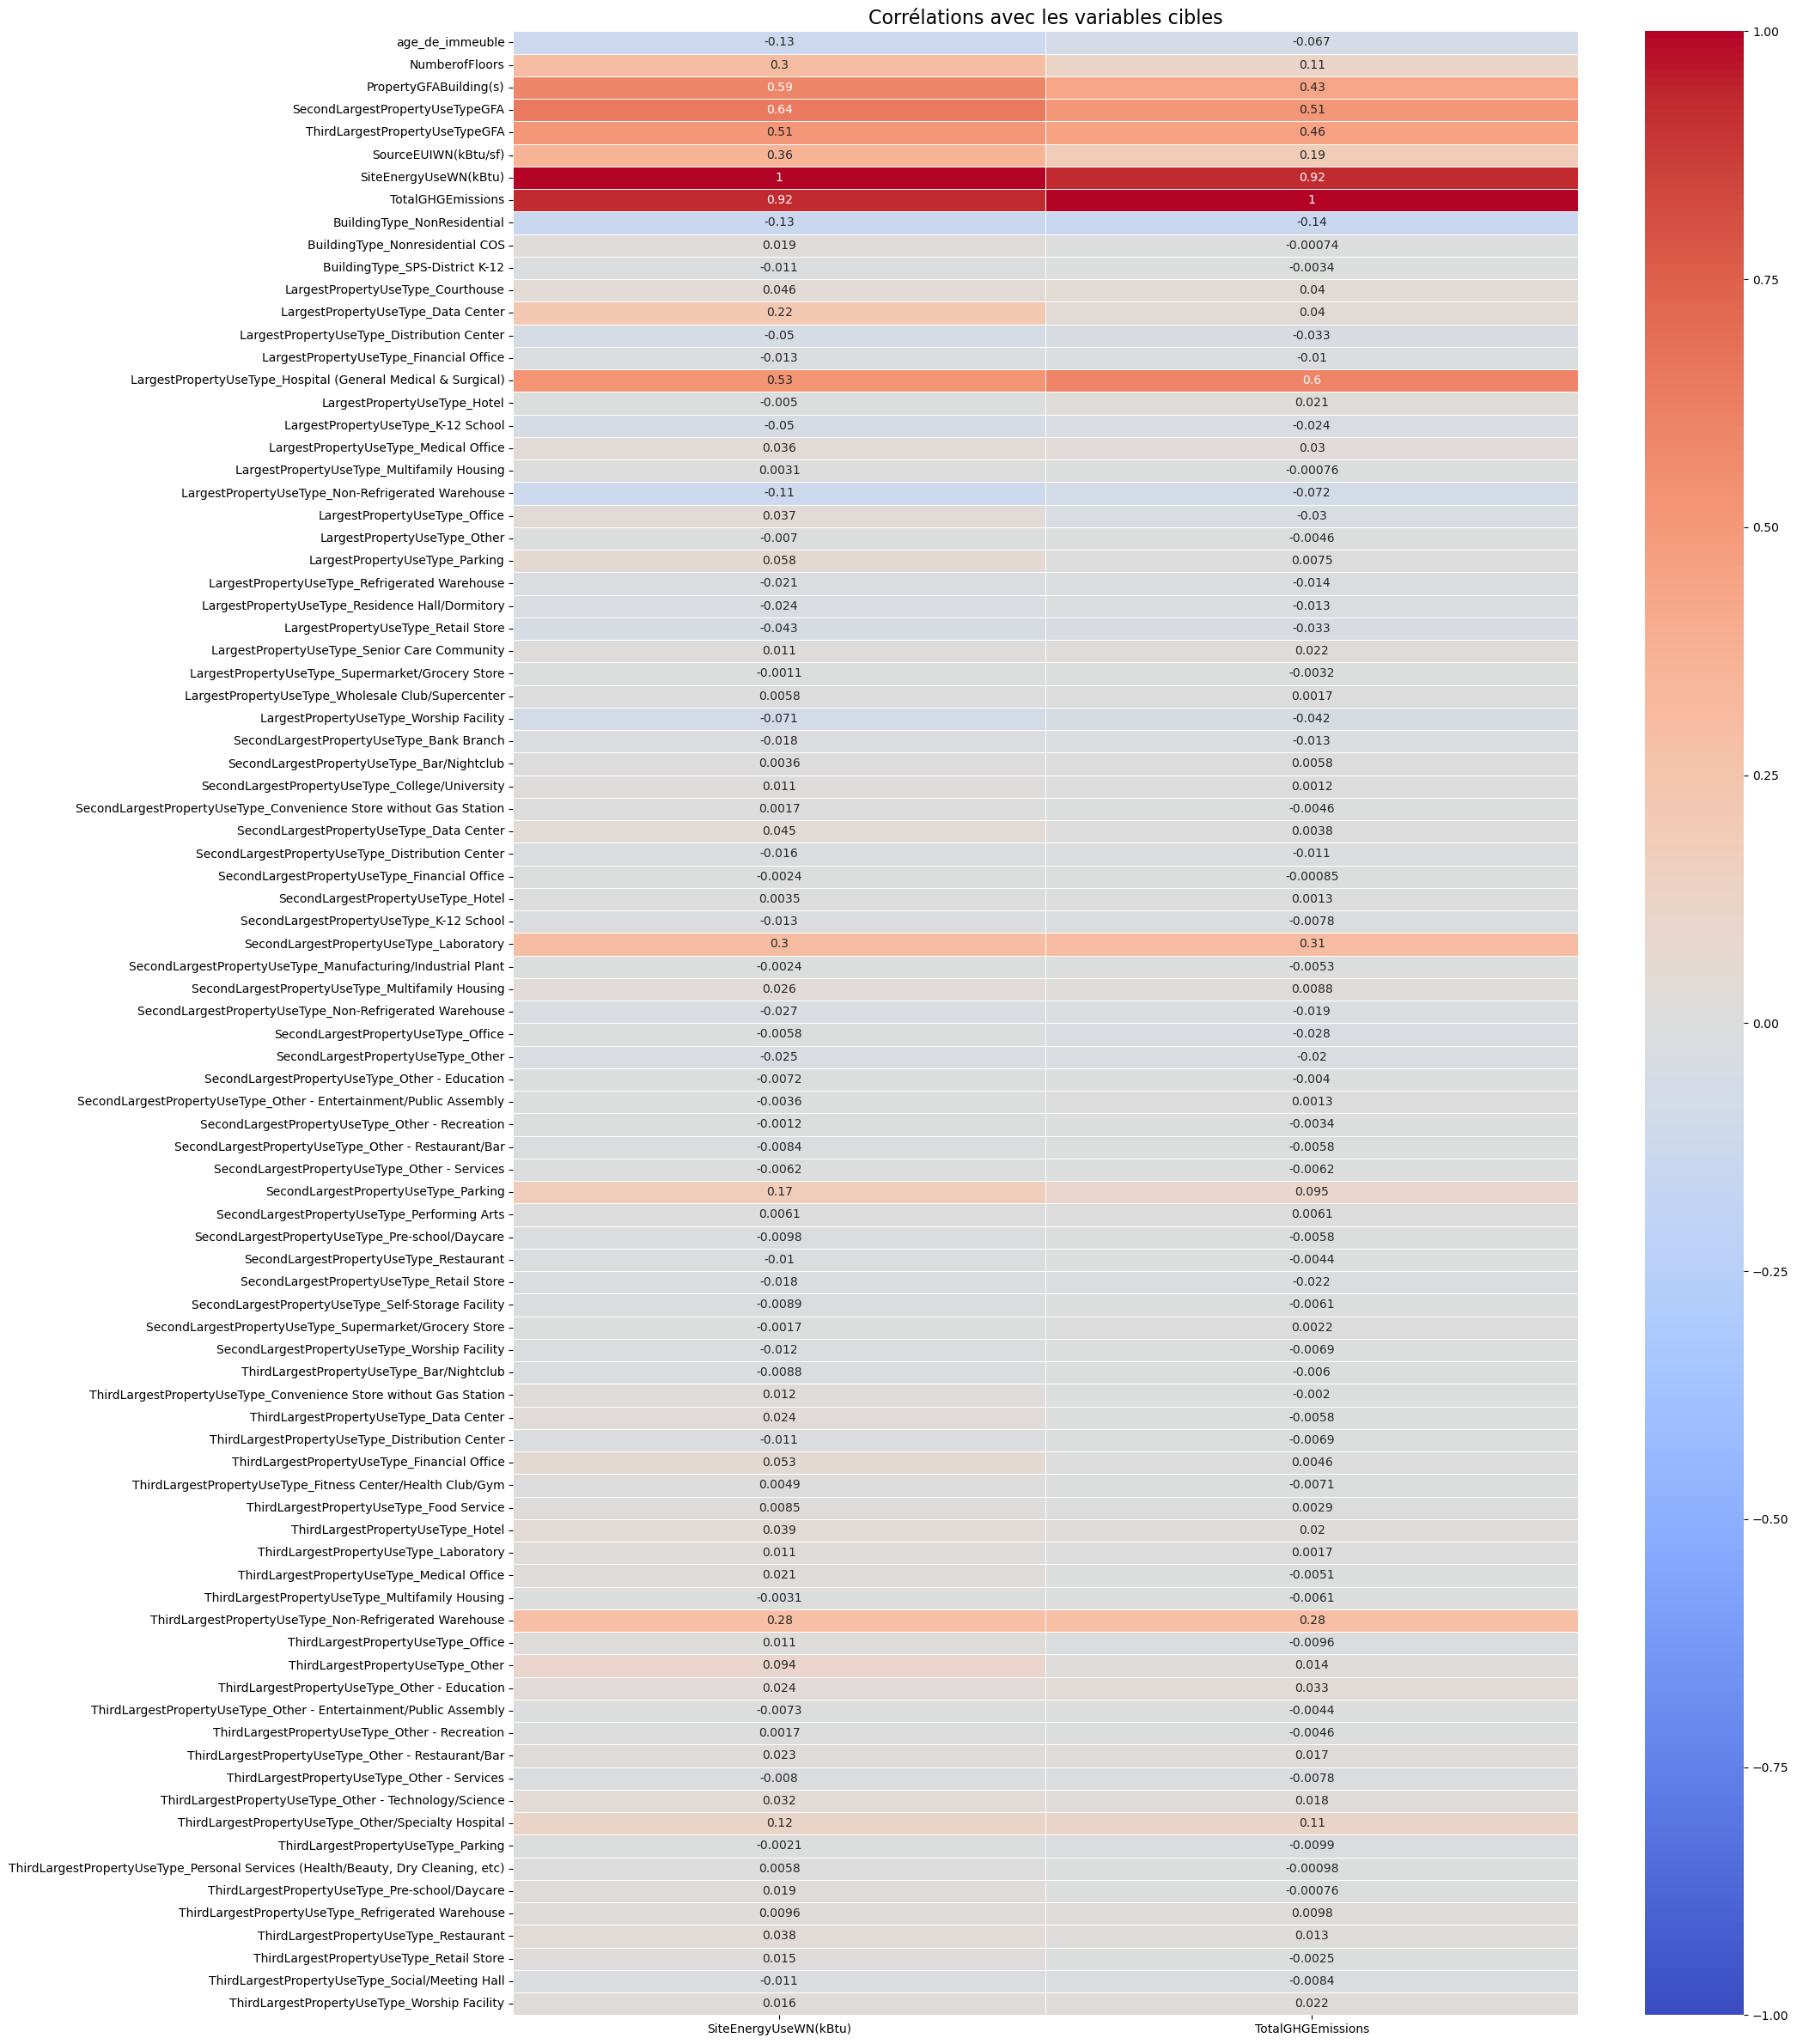

In [7]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Sélection des corrélations avec les cibles
target_correlation = correlation_matrix[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# Fonction pour trouver les top 5 variables les plus et les moins corrélées
def get_top_variables(correlation_df, target, top_n=5):
    # Trier les corrélations par ordre décroissant absolu
    sorted_corr = correlation_df[target].abs().sort_values(ascending=False)
    
    # Exclure la cible elle-même (corrélation avec elle-même = 1)
    sorted_corr = sorted_corr[sorted_corr.index != target]
    
    # Variables les plus corrélées
    most_correlated = sorted_corr.head(top_n).index.tolist()
    
    # Variables les moins corrélées
    least_correlated = sorted_corr.tail(top_n).index.tolist()
    
    return most_correlated, least_correlated

# Obtenir les variables les plus et les moins corrélées pour chaque cible
top_5_energy_use, bottom_5_energy_use = get_top_variables(target_correlation, 'SiteEnergyUseWN(kBtu)')
top_5_ghg_emissions, bottom_5_ghg_emissions = get_top_variables(target_correlation, 'TotalGHGEmissions')

# Afficher les résultats
print(f"Top 5 variables les plus corrélées avec 'SiteEnergyUseWN(kBtu)' : {top_5_energy_use}")
print(f"Top 5 variables les moins corrélées avec 'SiteEnergyUseWN(kBtu)' : {bottom_5_energy_use}\n")

print(f"Top 5 variables les plus corrélées avec 'TotalGHGEmissions' : {top_5_ghg_emissions}")
print(f"Top 5 variables les moins corrélées avec 'TotalGHGEmissions' : {bottom_5_ghg_emissions}")

# Heatmap des corrélations avec les cibles
plt.figure(figsize=(20, 30))
sns.heatmap(
    target_correlation,
    annot=True,           # Affiche les valeurs numériques dans la heatmap
    cmap="coolwarm",      # Palette de couleurs
    vmin=-1, vmax=1,      # Échelle des corrélations
    linewidths=0.5        # Épaisseur des lignes de séparation
)
plt.title("Corrélations avec les variables cibles", fontsize=16)
plt.show()


# 2) Premier model simple : 

# 2.1) regression linéaire : 
avec validation croisée et pipeline 

In [8]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Pipeline pour la régression linéaire
linear_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('linear_reg', LinearRegression())  # Modèle de régression linéaire
])

# 4. Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer le modèle avec validation croisée et calculer les métriques sur l'ensemble des données
def evaluate_model_with_cv_on_all_data(model, X, y, scaler, target_names, model_name):
    for target_idx, target_name in enumerate(target_names):
        # Prédictions sur toutes les données en utilisant cross_val_predict
        y_pred = cross_val_predict(model, X, y[:, target_idx], cv=kf)

        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))

        # Stocker les résultats
        results.append({
            'Model': model_name,  # Ajouter le nom du modèle
            'Target': target_name,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse,
        })

# Cibles à analyser
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

# Évaluer le modèle
evaluate_model_with_cv_on_all_data(linear_reg_pipeline, X, y_standardized, y_scaler, targets, model_name='Linear Regression')

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Ajouter les classements
results_df['Rank R²'] = results_df.groupby('Target')['R²'].rank(ascending=False)
results_df['Rank MAE'] = results_df.groupby('Target')['MAE'].rank(ascending=True)
results_df['Rank RMSE'] = results_df.groupby('Target')['RMSE'].rank(ascending=True)

# Afficher les résultats
print("Résultats de l'évaluation du modèle de régression linéaire sur toutes les données :")
results_df

Résultats de l'évaluation du modèle de régression linéaire sur toutes les données :


Model                 Target            R²           MAE  \
0  Linear Regression  SiteEnergyUseWN(kBtu) -1.865864e+25  3.600450e+11   
1  Linear Regression      TotalGHGEmissions -2.343546e+25  3.987829e+11   

           RMSE  Rank R²  Rank MAE  Rank RMSE  
0  4.319565e+12      1.0       1.0        1.0  
1  4.841019e+12      1.0       1.0        1.0

# 2.2) Regression linéaire modifiée : 

Utilisation de train_test_split pour diviser en 80/20.
Ajout de stratify avec pd.qcut pour stratifier les cibles.

In [9]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Division en jeu d'entraînement et de test (80/20) avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_standardized, test_size=0.2, random_state=42, stratify=pd.qcut(y['SiteEnergyUseWN(kBtu)'], q=4)
)

# 4. Pipeline pour la régression linéaire
linear_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('linear_reg', LinearRegression())  # Modèle de régression linéaire
])

# 5. Entraîner le modèle sur les données d'entraînement
linear_reg_pipeline.fit(X_train, y_train)

# 6. Faire des prédictions sur le jeu de test
y_pred = linear_reg_pipeline.predict(X_test)

# 7. Calculer les métriques pour chaque cible
results = []
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

for target_idx, target_name in enumerate(targets):
    # Calcul des métriques
    r2 = r2_score(y_test[:, target_idx], y_pred[:, target_idx])
    mae = mean_absolute_error(y_test[:, target_idx], y_pred[:, target_idx])
    rmse = np.sqrt(mean_squared_error(y_test[:, target_idx], y_pred[:, target_idx]))
    
    # Stocker les résultats
    results.append({
        'Model': 'Linear Regression',
        'Target': target_name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
    })

# 8. Convertir les résultats en DataFrame
results_df_2 = pd.DataFrame(results)

# 9. Ajouter les classements
results_df_2['Rank R²'] = results_df_2.groupby('Target')['R²'].rank(ascending=False)
results_df_2['Rank MAE'] = results_df_2.groupby('Target')['MAE'].rank(ascending=True)
results_df_2['Rank RMSE'] = results_df_2.groupby('Target')['RMSE'].rank(ascending=True)

# 10. Afficher les résultats
print("Résultats de l'évaluation du modèle de régression linéaire sur le jeu de test (80/20) :")
results_df_2


Résultats de l'évaluation du modèle de régression linéaire sur le jeu de test (80/20) :


Model                 Target            R²           MAE  \
0  Linear Regression  SiteEnergyUseWN(kBtu) -3.031200e+19  6.469251e+08   
1  Linear Regression      TotalGHGEmissions -7.185910e+20  3.402121e+09   

           RMSE  Rank R²  Rank MAE  Rank RMSE  
0  8.532952e+09      1.0       1.0        1.0  
1  4.487402e+10      1.0       1.0        1.0

# 2.3) refaire un deuxieme feature ingeniring en suppriment les variables peut corélées (<0,1 et >-0,1)

In [10]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Sélection des corrélations avec les cibles
target_correlation = correlation_matrix[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# Fonction pour trouver les variables avec une corrélation entre -0.3 et 0.3
def get_weakly_correlated_variables(correlation_df, target, lower_threshold=-0.1, upper_threshold=0.1):
    # Calcul des corrélations absolues
    abs_corr = correlation_df[target].abs()
    
    # Filtrer les variables qui sont entre -0,1 et 0,1 (faibles corrélations)
    weak_corr = abs_corr[(abs_corr > lower_threshold) & (abs_corr < upper_threshold)]
    
    # Exclure la cible elle-même
    weak_corr = weak_corr[weak_corr.index != target]
    
    return weak_corr.index.tolist()

# Obtenir les variables faiblement corrélées pour chaque cible
weakly_correlated_energy_use = get_weakly_correlated_variables(target_correlation, 'SiteEnergyUseWN(kBtu)')
weakly_correlated_ghg_emissions = get_weakly_correlated_variables(target_correlation, 'TotalGHGEmissions')

# Afficher les résultats
print(f"Variables faiblement corrélées avec 'SiteEnergyUseWN(kBtu)' (entre -0,1 et 0,1) : {weakly_correlated_energy_use}")
print(f"Variables faiblement corrélées avec 'TotalGHGEmissions' (entre -0,1 et 0,1) : {weakly_correlated_ghg_emissions}")


Variables faiblement corrélées avec 'SiteEnergyUseWN(kBtu)' (entre -0,1 et 0,1) : ['BuildingType_Nonresidential COS', 'BuildingType_SPS-District K-12', 'LargestPropertyUseType_Courthouse', 'LargestPropertyUseType_Distribution Center', 'LargestPropertyUseType_Financial Office', 'LargestPropertyUseType_Hotel', 'LargestPropertyUseType_K-12 School', 'LargestPropertyUseType_Medical Office', 'LargestPropertyUseType_Multifamily Housing', 'LargestPropertyUseType_Office', 'LargestPropertyUseType_Other', 'LargestPropertyUseType_Parking', 'LargestPropertyUseType_Refrigerated Warehouse', 'LargestPropertyUseType_Residence Hall/Dormitory', 'LargestPropertyUseType_Retail Store', 'LargestPropertyUseType_Senior Care Community', 'LargestPropertyUseType_Supermarket/Grocery Store', 'LargestPropertyUseType_Wholesale Club/Supercenter', 'LargestPropertyUseType_Worship Facility', 'SecondLargestPropertyUseType_Bank Branch', 'SecondLargestPropertyUseType_Bar/Nightclub', 'SecondLargestPropertyUseType_College/Uni

In [11]:
# Combiner les deux listes et supprimer les doublons en utilisant set
combined_weakly_correlated = list(set(weakly_correlated_energy_use + weakly_correlated_ghg_emissions))

# Afficher la liste combinée sans doublons
print(f"Liste combinée des variables faiblement corrélées (sans doublons) : {combined_weakly_correlated}")


Liste combinée des variables faiblement corrélées (sans doublons) : ['SecondLargestPropertyUseType_Supermarket/Grocery Store', 'SecondLargestPropertyUseType_Financial Office', 'SecondLargestPropertyUseType_Other', 'LargestPropertyUseType_Courthouse', 'SecondLargestPropertyUseType_Other - Entertainment/Public Assembly', 'SecondLargestPropertyUseType_K-12 School', 'SecondLargestPropertyUseType_Data Center', 'ThirdLargestPropertyUseType_Distribution Center', 'SecondLargestPropertyUseType_Office', 'age_de_immeuble', 'SecondLargestPropertyUseType_Other - Restaurant/Bar', 'LargestPropertyUseType_Retail Store', 'ThirdLargestPropertyUseType_Office', 'SecondLargestPropertyUseType_Other - Recreation', 'ThirdLargestPropertyUseType_Pre-school/Daycare', 'ThirdLargestPropertyUseType_Retail Store', 'ThirdLargestPropertyUseType_Restaurant', 'BuildingType_SPS-District K-12', 'LargestPropertyUseType_Distribution Center', 'SecondLargestPropertyUseType_Parking', 'ThirdLargestPropertyUseType_Other - Entert

In [12]:
# Supprimer les variables faiblement corrélées du DataFrame
df2 = df.drop(columns=combined_weakly_correlated)

# Afficher le DataFrame après suppression des variables
print(f"DataFrame après suppression des variables faiblement corrélées :")
df2


DataFrame après suppression des variables faiblement corrélées :


NumberofFloors  PropertyGFABuilding(s)  SecondLargestPropertyUseTypeGFA  \
0                12                   88434                              0.0   
1                11                   88502                          15064.0   
2                10                   61320                              0.0   
3                11                   83008                              0.0   
4                15                  163984                              0.0   
..              ...                     ...                              ...   
863              14                  144614                              0.0   
864              12                  317442                         136594.0   
865              12                  317189                         147597.0   
866              13                  339038                         202178.0   
867               2                   24990                              0.0   

     ThirdLargestPropertyUseTypeGFA  SourceEUIWN(kBtu/sf)  \
0                          0.000000            189.000000   
1                       4622.000000            179.399994   
2                          0.000000            224.000000   
3                          0.000000            154.699997   
4                          0.000000            187.199997   
..                              ...                   ...   
863                        0.000000            105.599998   
864                        0.000000            110.000000   
865                        0.000000            117.599998   
866                     6313.200195            101.599998   
867                        0.000000            378.700012   

     SiteEnergyUseWN(kBtu)  TotalGHGEmissions  BuildingType_NonResidential  \
0                7456910.0             249.98                            1   
1                8664479.0             295.86                            1   
2                6946800.5             286.43                            1   
3                6062767.5             176.14                            1   
4               14194054.0             392.16                            1   
..                     ...                ...                          ...   
863              5547964.5              50.32                            1   
864             12926544.0             147.14                            1   
865             14409447.0             202.12                            1   
866             14037166.0             245.16                            0   
867              4731813.5             134.80                            1   

     LargestPropertyUseType_Hospital (General Medical & Surgical)  \
0                                                    0              
1                                                    0              
2                                                    0              
3                                                    0              
4                                                    0              
..                                                 ...              
863                                                  0              
864                                                  0              
865                                                  0              
866                                                  0              
867                                                  0              

     SecondLargestPropertyUseType_Laboratory  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
..                                       ...   
863                                        0   
864                                        0   
865                                        0   
866                                        0   
867              

# 2.4) Rgression linéaire sans les features les moins coréllées : 

In [13]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df2.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df2[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Pipeline pour la régression linéaire
linear_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('linear_reg', LinearRegression())  # Modèle de régression linéaire
])

# 4. Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer le modèle avec validation croisée et calculer les métriques sur l'ensemble des données
def evaluate_model_with_cv_on_all_data(model, X, y, scaler, target_names, model_name):
    for target_idx, target_name in enumerate(target_names):
        # Prédictions sur toutes les données en utilisant cross_val_predict
        y_pred = cross_val_predict(model, X, y[:, target_idx], cv=kf)

        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))

        # Stocker les résultats
        results.append({
            'Model': model_name,  # Ajouter le nom du modèle
            'Target': target_name,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse,
        })

# Cibles à analyser
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

# Évaluer le modèle
evaluate_model_with_cv_on_all_data(linear_reg_pipeline, X, y_standardized, y_scaler, targets, model_name='Linear Regression')

# Convertir les résultats en DataFrame
results_df2_nettoyé = pd.DataFrame(results)

# Ajouter les classements
results_df2_nettoyé['Rank R²'] = results_df2_nettoyé.groupby('Target')['R²'].rank(ascending=False)
results_df2_nettoyé['Rank MAE'] = results_df2_nettoyé.groupby('Target')['MAE'].rank(ascending=True)
results_df2_nettoyé['Rank RMSE'] = results_df2_nettoyé.groupby('Target')['RMSE'].rank(ascending=True)

# Afficher les résultats
print("Résultats de l'évaluation du modèle de régression linéaire sur toutes les données :")
results_df2_nettoyé

Résultats de l'évaluation du modèle de régression linéaire sur toutes les données :


Model                 Target        R²       MAE      RMSE  \
0  Linear Regression  SiteEnergyUseWN(kBtu)  0.314022  0.231053  0.828238   
1  Linear Regression      TotalGHGEmissions  0.106519  0.235618  0.945241   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 2.5) Rgression linéaire modifiée sans les features les moins coréllées :

In [14]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df2.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df2[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Division en jeu d'entraînement et de test (80/20) avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y_standardized, test_size=0.2, random_state=42, stratify=pd.qcut(y['SiteEnergyUseWN(kBtu)'], q=4)
)

# 4. Pipeline pour la régression linéaire
linear_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('linear_reg', LinearRegression())  # Modèle de régression linéaire
])

# 5. Entraîner le modèle sur les données d'entraînement
linear_reg_pipeline.fit(X_train, y_train)

# 6. Faire des prédictions sur le jeu de test
y_pred = linear_reg_pipeline.predict(X_test)

# 7. Calculer les métriques pour chaque cible
results = []
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

for target_idx, target_name in enumerate(targets):
    # Calcul des métriques
    r2 = r2_score(y_test[:, target_idx], y_pred[:, target_idx])
    mae = mean_absolute_error(y_test[:, target_idx], y_pred[:, target_idx])
    rmse = np.sqrt(mean_squared_error(y_test[:, target_idx], y_pred[:, target_idx]))
    
    # Stocker les résultats
    results.append({
        'Model': 'Linear Regression',
        'Target': target_name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
    })

# 8. Convertir les résultats en DataFrame
results_df2_nettoyé_2 = pd.DataFrame(results)

# 9. Ajouter les classements
results_df2_nettoyé_2['Rank R²'] = results_df2_nettoyé_2.groupby('Target')['R²'].rank(ascending=False)
results_df2_nettoyé_2['Rank MAE'] = results_df2_nettoyé_2.groupby('Target')['MAE'].rank(ascending=True)
results_df2_nettoyé_2['Rank RMSE'] = results_df2_nettoyé_2.groupby('Target')['RMSE'].rank(ascending=True)

# 10. Afficher les résultats
print("Résultats de l'évaluation du modèle de régression linéaire sur le jeu de test (80/20) :")
results_df2_nettoyé_2

Résultats de l'évaluation du modèle de régression linéaire sur le jeu de test (80/20) :


Model                 Target        R²       MAE      RMSE  \
0  Linear Regression  SiteEnergyUseWN(kBtu)  0.204204  0.247834  1.382589   
1  Linear Regression      TotalGHGEmissions -0.014962  0.297909  1.686472   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 3) Essais avec d'autres models : 

# 3.1) Bayesian Ridge Regression.

In [15]:
# 1. Séparer les caractéristiques (X) et les cibles (y)
X = df.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])  
y = df[['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']]

# 2. Standardisation des cibles
y_scaler = StandardScaler()
y_standardized = y_scaler.fit_transform(y)

# 3. Pipeline pour la Bayesian Ridge Regression
bayesian_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des caractéristiques
    ('bayesian_ridge', BayesianRidge())  # Modèle Bayesian Ridge Regression
])

# 4. Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer le modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_with_cv_on_all_data(model, X, y, scaler, target_names, model_name):
    for target_idx, target_name in enumerate(target_names):
        # Prédictions sur toutes les données en utilisant cross_val_predict
        y_pred = cross_val_predict(model, X, y[:, target_idx], cv=kf)

        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))

        # Stocker les résultats
        results.append({
            'Model': model_name,  # Ajouter le nom du modèle
            'Target': target_name,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse,
        })

# Cibles à analyser
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

# Évaluer le modèle
evaluate_model_with_cv_on_all_data(bayesian_ridge_pipeline, X, y_standardized, y_scaler, targets, model_name='Bayesian Ridge Regression')

# Convertir les résultats en DataFrame
results_df_bayesian = pd.DataFrame(results)

# Ajouter les classements
results_df_bayesian['Rank R²'] = results_df_bayesian.groupby('Target')['R²'].rank(ascending=False)
results_df_bayesian['Rank MAE'] = results_df_bayesian.groupby('Target')['MAE'].rank(ascending=True)
results_df_bayesian['Rank RMSE'] = results_df_bayesian.groupby('Target')['RMSE'].rank(ascending=True)

# Afficher les résultats
print("Résultats de l'évaluation du modèle Bayesian Ridge Regression sur toutes les données :")
results_df_bayesian


Résultats de l'évaluation du modèle Bayesian Ridge Regression sur toutes les données :


Model                 Target        R²       MAE  \
0  Bayesian Ridge Regression  SiteEnergyUseWN(kBtu)  0.343195  0.220286   
1  Bayesian Ridge Regression      TotalGHGEmissions  0.152802  0.237861   

       RMSE  Rank R²  Rank MAE  Rank RMSE  
0  0.810435      1.0       1.0        1.0  
1  0.920433      1.0       1.0        1.0

# 3.1.2) Régression Ridge et Lasso avec Évaluation et Validation Croisée 

In [16]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir les pipelines pour Ridge et Lasso
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('lasso', Lasso())
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour Ridge et Lasso
param_grid_ridge = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser alpha
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleur alpha
        print(f"Meilleur alpha pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer Ridge et Lasso
evaluate_model_on_all_data(ridge_pipeline, X, y_standardized, 'Ridge', param_grid_ridge)
evaluate_model_on_all_data(lasso_pipeline, X, y_standardized, 'Lasso', param_grid_lasso)

# Convertir les résultats en DataFrame
results_dfRL = pd.DataFrame(results)

# Ajouter les classements
results_dfRL['Rank R²'] = results_dfRL.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfRL['Rank MAE'] = results_dfRL.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfRL['Rank RMSE'] = results_dfRL.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Comparaison des modèles (Ridge vs Lasso) avec validation croisée et optimisation d'alpha :")
results_dfRL

Meilleur alpha pour Ridge (SiteEnergyUseWN(kBtu)) : {'ridge__alpha': 100.0}
Meilleur alpha pour Ridge (TotalGHGEmissions) : {'ridge__alpha': 100.0}
Meilleur alpha pour Lasso (SiteEnergyUseWN(kBtu)) : {'lasso__alpha': 0.1}
Meilleur alpha pour Lasso (TotalGHGEmissions) : {'lasso__alpha': 0.1}
Comparaison des modèles (Ridge vs Lasso) avec validation croisée et optimisation d'alpha :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  Ridge  SiteEnergyUseWN(kBtu)  0.399157  0.204351  0.775141      1.0   
1  Ridge      TotalGHGEmissions  0.223234  0.222084  0.881343      2.0   
2  Lasso  SiteEnergyUseWN(kBtu)  0.388265  0.196047  0.782135      2.0   
3  Lasso      TotalGHGEmissions  0.255034  0.200858  0.863114      1.0   

   Rank MAE  Rank RMSE  
0       2.0        1.0  
1       2.0        2.0  
2       1.0        2.0  
3       1.0        1.0

# 3.2.1)Régression Ridge et Lasso avec Évaluation et Validation Croisée optimizé 

In [17]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Étendre les grilles d'hyperparamètres pour Ridge et Lasso
param_grid_ridge = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Contrôle de la régularisation
    'ridge__tol': [1e-4, 1e-3, 1e-2],               # Tolérance pour convergence
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'lbfgs'],  # Différents solveurs
}

param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Contrôle de la régularisation
    'lasso__tol': [1e-4, 1e-3, 1e-2],                      # Tolérance pour convergence
    'lasso__max_iter': [1000, 2000, 5000]                  # Nombre max d'itérations
}

# Pipelines pour Ridge et Lasso
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('lasso', Lasso())
])

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleur ensemble d'hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}):", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle
        best_model = grid_search.best_estimator_
        y_pred = cross_val_predict(best_model, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer Ridge et Lasso avec leurs grilles d'hyperparamètres étendues
evaluate_model_on_all_data(ridge_pipeline, X, y_standardized, 'Ridge', param_grid_ridge)
evaluate_model_on_all_data(lasso_pipeline, X, y_standardized, 'Lasso', param_grid_lasso)

# Convertir les résultats en DataFrame
results_dfRL_2 = pd.DataFrame(results)

# Ajouter les classements
results_dfRL_2['Rank R²'] = results_dfRL_2.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfRL_2['Rank MAE'] = results_dfRL_2.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfRL_2['Rank RMSE'] = results_dfRL_2.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Comparaison des modèles Ridge et Lasso avec validation croisée et optimisation des hyperparamètres :")
results_dfRL_2


Fitting 5 folds for each of 105 candidates, totalling 525 fits
Meilleurs hyperparamètres pour Ridge (SiteEnergyUseWN(kBtu)): {'ridge__alpha': 100.0, 'ridge__solver': 'sag', 'ridge__tol': 0.01}
Fitting 5 folds for each of 105 candidates, totalling 525 fits
Meilleurs hyperparamètres pour Ridge (TotalGHGEmissions): {'ridge__alpha': 100.0, 'ridge__solver': 'sag', 'ridge__tol': 0.01}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs hyperparamètres pour Lasso (SiteEnergyUseWN(kBtu)): {'lasso__alpha': 0.1, 'lasso__max_iter': 1000, 'lasso__tol': 0.01}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs hyperparamètres pour Lasso (TotalGHGEmissions): {'lasso__alpha': 0.1, 'lasso__max_iter': 1000, 'lasso__tol': 0.01}
Comparaison des modèles Ridge et Lasso avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  Ridge  SiteEnergyUseWN(kBtu)  0.404284  0.204056  0.771826      1.0   
1  Ridge      TotalGHGEmissions  0.236909  0.220900  0.873551      2.0   
2  Lasso  SiteEnergyUseWN(kBtu)  0.388644  0.196238  0.781892      2.0   
3  Lasso      TotalGHGEmissions  0.255176  0.200952  0.863032      1.0   

   Rank MAE  Rank RMSE  
0       2.0        1.0  
1       2.0        2.0  
2       1.0        2.0  
3       1.0        1.0

# 3.3) ElasticNet avec validation croisée et optimisation des hyperparamètres :

In [18]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour ElasticNet
elasticnet_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('elasticnet', ElasticNet())
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour ElasticNet
param_grid_elasticnet = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # L1_ratio entre 0 (Ridge) et 1 (Lasso)
}

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer le modèle ElasticNet avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer le modèle ElasticNet
evaluate_model_on_all_data(elasticnet_pipeline, X, y_standardized, 'ElasticNet', param_grid_elasticnet)

# Convertir les résultats en DataFrame
results_dfEN = pd.DataFrame(results)

# Ajouter les classements
results_dfEN['Rank R²'] = results_dfEN.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfEN['Rank MAE'] = results_dfEN.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfEN['Rank RMSE'] = results_dfEN.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats d'ElasticNet avec validation croisée et optimisation des hyperparamètres :")
results_dfEN

Meilleurs hyperparamètres pour ElasticNet (SiteEnergyUseWN(kBtu)) : {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 0.1}
Meilleurs hyperparamètres pour ElasticNet (TotalGHGEmissions) : {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 0.1}
Résultats d'ElasticNet avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  ElasticNet  SiteEnergyUseWN(kBtu)  0.384087  0.202482  0.784801      1.0   
1  ElasticNet      TotalGHGEmissions  0.243794  0.197470  0.869601      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 3.4) Arbre de Décision avec Évaluation et validation croisée et optimisation des hyperparamètres :

In [19]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour l'arbre de décision
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features (optionnel pour les arbres)
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour l'arbre de décision
param_grid_tree = {
    'tree__max_depth': [None, 5, 10, 20],  # Profondeur maximale de l'arbre
    'tree__min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons pour diviser un nœud
    'tree__min_samples_leaf': [1, 2, 4]  # Nombre minimal d'échantillons dans une feuille
}

# Initialiser une liste pour stocker les résultats
results_tree = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_tree.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer l'arbre de décision
evaluate_model_on_all_data(tree_pipeline, X, y_standardized, 'Decision Tree', param_grid_tree)

# Convertir les résultats en DataFrame
results_tree_df = pd.DataFrame(results_tree)

# Ajouter les classements
results_tree_df['Rank R²'] = results_tree_df.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_tree_df['Rank MAE'] = results_tree_df.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_tree_df['Rank RMSE'] = results_tree_df.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres :")
results_tree_df

Meilleurs hyperparamètres pour Decision Tree (SiteEnergyUseWN(kBtu)) : {'tree__max_depth': 20, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Meilleurs hyperparamètres pour Decision Tree (TotalGHGEmissions) : {'tree__max_depth': 20, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 10}
Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  \
0  Decision Tree  SiteEnergyUseWN(kBtu)  0.420695  0.142782  0.761121   
1  Decision Tree      TotalGHGEmissions  0.213741  0.165869  0.886713   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 3.5) Arbre de Décision avec Évaluation et Validation Croisée optimizé 

In [20]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour l'arbre de décision
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features (optionnel pour les arbres)
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille étendue d'hyperparamètres pour l'arbre de décision
param_grid_tree = {
    'tree__max_depth': [None, 5, 10, 20, 50],  # Profondeur maximale de l'arbre
    'tree__min_samples_split': [2, 5, 10, 20],  # Nombre minimal d'échantillons pour diviser un nœud
    'tree__min_samples_leaf': [1, 2, 4, 8],  # Nombre minimal d'échantillons dans une feuille
    'tree__max_features': [None, 'sqrt', 'log2'],  # Nombre de features à considérer pour chaque division
    'tree__max_leaf_nodes': [None, 10, 20, 50]  # Nombre maximal de feuilles dans l'arbre
}

# Initialiser une liste pour stocker les résultats
results_tree = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}):", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        best_model = grid_search.best_estimator_
        y_pred = cross_val_predict(best_model, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_tree.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer l'arbre de décision avec des hyperparamètres étendus
evaluate_model_on_all_data(tree_pipeline, X, y_standardized, 'Decision Tree', param_grid_tree)

# Convertir les résultats en DataFrame
results_tree_df_2 = pd.DataFrame(results_tree)

# Ajouter les classements
results_tree_df_2['Rank R²'] = results_tree_df_2.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_tree_df_2['Rank MAE'] = results_tree_df_2.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_tree_df_2['Rank RMSE'] = results_tree_df_2.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres étendus :")
results_tree_df_2


Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Meilleurs hyperparamètres pour Decision Tree (SiteEnergyUseWN(kBtu)): {'tree__max_depth': None, 'tree__max_features': None, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 8, 'tree__min_samples_split': 2}
Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Meilleurs hyperparamètres pour Decision Tree (TotalGHGEmissions): {'tree__max_depth': 10, 'tree__max_features': None, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 8, 'tree__min_samples_split': 20}
Résultats de l'arbre de décision avec validation croisée et optimisation des hyperparamètres étendus :


Model                 Target        R²       MAE      RMSE  \
0  Decision Tree  SiteEnergyUseWN(kBtu)  0.502038  0.146259  0.705664   
1  Decision Tree      TotalGHGEmissions  0.365840  0.177084  0.796342   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 3.6) XGBoost 

In [21]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Définir le pipeline pour XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features (optionnel pour XGBoost)
    ('xgb', XGBRegressor(random_state=42))
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour XGBoost
param_grid_xgb = {
    'xgb__n_estimators': [100, 200, 300],  # Nombre d'arbres
    'xgb__max_depth': [3, 5, 7],  # Profondeur maximale de chaque arbre
    'xgb__learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'xgb__subsample': [0.8, 1.0],  # Fraction des échantillons utilisés pour chaque arbre
    'xgb__colsample_bytree': [0.8, 1.0]  # Fraction des caractéristiques utilisées pour chaque arbre
}

# Initialiser une liste pour stocker les résultats
results_xgb = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y_standardized[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Prédictions sur toutes les données en utilisant le meilleur modèle après GridSearch
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y_standardized[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y_standardized[:, target_idx], y_pred)
        mae = mean_absolute_error(y_standardized[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y_standardized[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_xgb.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer XGBoost
evaluate_model_on_all_data(xgb_pipeline, X, y_standardized, 'XGBoost', param_grid_xgb)

# Convertir les résultats en DataFrame
results_xgb_df = pd.DataFrame(results_xgb)

# Ajouter les classements
results_xgb_df['Rank R²'] = results_xgb_df.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_xgb_df['Rank MAE'] = results_xgb_df.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_xgb_df['Rank RMSE'] = results_xgb_df.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats de XGBoost avec validation croisée et optimisation des hyperparamètres :")
results_xgb_df

Meilleurs hyperparamètres pour XGBoost (SiteEnergyUseWN(kBtu)) : {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
Meilleurs hyperparamètres pour XGBoost (TotalGHGEmissions) : {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}
Résultats de XGBoost avec validation croisée et optimisation des hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  XGBoost  SiteEnergyUseWN(kBtu)  0.577373  0.110449  0.650097      1.0   
1  XGBoost      TotalGHGEmissions  0.399915  0.135786  0.774652      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 3.6.1) Modification des hyperparamettres pour XGBOOST 

In [22]:
# Grille d'hyperparamètres étendue pour XGBoost
param_grid_xgb_extended = {
    'xgb__n_estimators': [50, 100, 200, 300, 500],
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.3],
    'xgb__reg_alpha': [0, 0.1, 1],
    'xgb__reg_lambda': [0.1, 1, 10]
}

# Fonction pour évaluer un modèle avec RandomizedSearchCV
def evaluate_model_random_search(model, X, y, model_name, param_grid, n_iter=50):
    results_xgb = []  # N'oubliez pas de définir la liste avant l'évaluation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Assurez-vous que le KFold est bien défini
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Randomized Search pour optimiser les hyperparamètres
        random_search = RandomizedSearchCV(
            model, param_distributions=param_grid, 
            n_iter=n_iter, cv=kf, scoring='neg_root_mean_squared_error', random_state=42
        )
        random_search.fit(X, y[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", random_search.best_params_)
        
        # Prédictions sur toutes les données
        y_pred = cross_val_predict(random_search.best_estimator_, X, y[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_xgb.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

    # Convertir les résultats en DataFrame
    results_xgb_df = pd.DataFrame(results_xgb)
    # Ajouter les classements
    results_xgb_df['Rank R²'] = results_xgb_df.groupby('Target')['R²'].rank(ascending=False)
    results_xgb_df['Rank MAE'] = results_xgb_df.groupby('Target')['MAE'].rank(ascending=True)
    results_xgb_df['Rank RMSE'] = results_xgb_df.groupby('Target')['RMSE'].rank(ascending=True)

    # Afficher les résultats
    print("Résultats étendus de XGBoost avec RandomizedSearchCV :")
    return results_xgb_df

# Appel de la fonction
results_xgb_df_2 = evaluate_model_random_search(xgb_pipeline, X, y_standardized, 'XGBoost', param_grid_xgb_extended, n_iter=50)

# Affichage des résultats
results_xgb_df_2


Meilleurs hyperparamètres pour XGBoost (SiteEnergyUseWN(kBtu)) : {'xgb__subsample': 1.0, 'xgb__reg_lambda': 10, 'xgb__reg_alpha': 1, 'xgb__n_estimators': 500, 'xgb__min_child_weight': 5, 'xgb__max_depth': 10, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0.3, 'xgb__colsample_bytree': 1.0}
Meilleurs hyperparamètres pour XGBoost (TotalGHGEmissions) : {'xgb__subsample': 0.8, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 500, 'xgb__min_child_weight': 5, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.2, 'xgb__gamma': 0, 'xgb__colsample_bytree': 1.0}
Résultats étendus de XGBoost avec RandomizedSearchCV :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0  XGBoost  SiteEnergyUseWN(kBtu)  0.689364  0.121273  0.557347      1.0   
1  XGBoost      TotalGHGEmissions  0.545331  0.153539  0.674292      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 3.7) Model de réseaux de neurones

In [23]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Standardisation des features (important pour les réseaux de neurones)
scaler_X = StandardScaler()
X_standardized = scaler_X.fit_transform(X)

# Fonction pour créer le modèle de réseaux de neurones
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  # Couche cachée 1
    model.add(Dense(32, activation='relu'))  # Couche cachée 2
    model.add(Dense(16, activation='relu'))  # Couche cachée 3
    model.add(Dense(1, activation='linear'))  # Couche de sortie (régression)
    
    # Compiler le modèle
    optimizer = Adam(learning_rate=0.001)  # Optimiseur Adam avec un taux d'apprentissage
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

# Envelopper le modèle Keras dans un wrapper compatible avec scikit-learn
nn_model = KerasRegressor(build_fn=lambda: create_nn_model(X_standardized.shape[1]), epochs=50, batch_size=32, verbose=0)

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser une liste pour stocker les résultats
results_nn = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Validation croisée
        y_pred = cross_val_predict(model, X, y[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))
        
        # Stocker les résultats
        results_nn.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer le modèle de réseaux de neurones
evaluate_model_on_all_data(nn_model, X_standardized, y_standardized, 'Neural Network')

# Convertir les résultats en DataFrame
results_nn_df = pd.DataFrame(results_nn)

# Ajouter les classements
results_nn_df['Rank R²'] = results_nn_df.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_nn_df['Rank MAE'] = results_nn_df.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_nn_df['Rank RMSE'] = results_nn_df.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Résultats du réseau de neurones avec validation croisée :")
results_nn_df

Résultats du réseau de neurones avec validation croisée :


Model                 Target        R²       MAE      RMSE  \
0  Neural Network  SiteEnergyUseWN(kBtu)  0.374297  0.196855  0.791014   
1  Neural Network      TotalGHGEmissions  0.401398  0.189191  0.773694   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# 3.8) Support Vector Machines (SVM)

In [24]:
# Standardisation des cibles
scaler_y = StandardScaler()
y_standardized = scaler_y.fit_transform(y)

# Pipeline pour le modèle SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des features
    ('svr', SVR())
])

# Validation croisée avec KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grille d'hyperparamètres pour SVM
param_grid_svm = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.2, 0.5],
    'svr__kernel': ['linear', 'rbf']
}

# Initialiser une liste pour stocker les résultats
results = []

# Fonction pour évaluer un modèle avec validation croisée et calculer les métriques sur toutes les données
def evaluate_model_on_all_data(model, X, y, model_name, param_grid):
    for target_idx, target in enumerate(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']):
        # Grid Search pour optimiser les hyperparamètres
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_root_mean_squared_error')
        grid_search.fit(X, y[:, target_idx])
        
        # Meilleurs hyperparamètres
        print(f"Meilleurs hyperparamètres pour {model_name} ({target}) :", grid_search.best_params_)
        
        # Validation croisée avec les meilleurs hyperparamètres (prédictions sur toutes les données)
        y_pred = cross_val_predict(grid_search.best_estimator_, X, y[:, target_idx], cv=kf)
        
        # Calcul des scores R², MAE, RMSE sur toutes les données
        r2 = r2_score(y[:, target_idx], y_pred)
        mae = mean_absolute_error(y[:, target_idx], y_pred)
        rmse = np.sqrt(mean_squared_error(y[:, target_idx], y_pred))
        
        # Stocker les résultats
        results.append({
            'Model': model_name,
            'Target': target,
            'R²': r2,
            'MAE': mae,
            'RMSE': rmse
        })

# Évaluer le modèle SVM
evaluate_model_on_all_data(svm_pipeline, X, y_standardized, 'SVM', param_grid_svm)

# Convertir les résultats en DataFrame
results_dfSVM = pd.DataFrame(results)

# Ajouter les classements
results_dfSVM['Rank R²'] = results_dfSVM.groupby('Target')['R²'].rank(ascending=False)  # Plus grand R² est meilleur
results_dfSVM['Rank MAE'] = results_dfSVM.groupby('Target')['MAE'].rank(ascending=True)  # Plus petit MAE est meilleur
results_dfSVM['Rank RMSE'] = results_dfSVM.groupby('Target')['RMSE'].rank(ascending=True)  # Plus petit RMSE est meilleur

# Afficher les résultats
print("Comparaison du modèle SVM avec validation croisée et optimisation d'hyperparamètres :")
results_dfSVM


Meilleurs hyperparamètres pour SVM (SiteEnergyUseWN(kBtu)) : {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
Meilleurs hyperparamètres pour SVM (TotalGHGEmissions) : {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
Comparaison du modèle SVM avec validation croisée et optimisation d'hyperparamètres :


Model                 Target        R²       MAE      RMSE  Rank R²  \
0   SVM  SiteEnergyUseWN(kBtu)  0.511827  0.142971  0.698693      1.0   
1   SVM      TotalGHGEmissions  0.521791  0.130831  0.691527      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 4) LES RESULTATS : 

# Régression linéaire 

In [25]:
results_df

Model                 Target            R²           MAE  \
0  Linear Regression  SiteEnergyUseWN(kBtu) -1.865864e+25  3.600450e+11   
1  Linear Regression      TotalGHGEmissions -2.343546e+25  3.987829e+11   

           RMSE  Rank R²  Rank MAE  Rank RMSE  
0  4.319565e+12      1.0       1.0        1.0  
1  4.841019e+12      1.0       1.0        1.0

In [26]:
results_df_2

Model                 Target            R²           MAE  \
0  Linear Regression  SiteEnergyUseWN(kBtu) -3.031200e+19  6.469251e+08   
1  Linear Regression      TotalGHGEmissions -7.185910e+20  3.402121e+09   

           RMSE  Rank R²  Rank MAE  Rank RMSE  
0  8.532952e+09      1.0       1.0        1.0  
1  4.487402e+10      1.0       1.0        1.0

In [27]:
results_df2_nettoyé

Model                 Target        R²       MAE      RMSE  \
0  Linear Regression  SiteEnergyUseWN(kBtu)  0.314022  0.231053  0.828238   
1  Linear Regression      TotalGHGEmissions  0.106519  0.235618  0.945241   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

In [28]:
results_df2_nettoyé_2

Model                 Target        R²       MAE      RMSE  \
0  Linear Regression  SiteEnergyUseWN(kBtu)  0.204204  0.247834  1.382589   
1  Linear Regression      TotalGHGEmissions -0.014962  0.297909  1.686472   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# BayesianRidge

In [29]:
results_df_bayesian

Model                 Target        R²       MAE  \
0  Bayesian Ridge Regression  SiteEnergyUseWN(kBtu)  0.343195  0.220286   
1  Bayesian Ridge Regression      TotalGHGEmissions  0.152802  0.237861   

       RMSE  Rank R²  Rank MAE  Rank RMSE  
0  0.810435      1.0       1.0        1.0  
1  0.920433      1.0       1.0        1.0

#  Régression Ridge et Lasso avec Évaluation et Validation Croisée

In [30]:
results_dfRL

Model                 Target        R²       MAE      RMSE  Rank R²  \
0  Ridge  SiteEnergyUseWN(kBtu)  0.399157  0.204351  0.775141      1.0   
1  Ridge      TotalGHGEmissions  0.223234  0.222084  0.881343      2.0   
2  Lasso  SiteEnergyUseWN(kBtu)  0.388265  0.196047  0.782135      2.0   
3  Lasso      TotalGHGEmissions  0.255034  0.200858  0.863114      1.0   

   Rank MAE  Rank RMSE  
0       2.0        1.0  
1       2.0        2.0  
2       1.0        2.0  
3       1.0        1.0

In [31]:
results_dfRL_2

Model                 Target        R²       MAE      RMSE  Rank R²  \
0  Ridge  SiteEnergyUseWN(kBtu)  0.404284  0.204056  0.771826      1.0   
1  Ridge      TotalGHGEmissions  0.236909  0.220900  0.873551      2.0   
2  Lasso  SiteEnergyUseWN(kBtu)  0.388644  0.196238  0.781892      2.0   
3  Lasso      TotalGHGEmissions  0.255176  0.200952  0.863032      1.0   

   Rank MAE  Rank RMSE  
0       2.0        1.0  
1       2.0        2.0  
2       1.0        2.0  
3       1.0        1.0

# ElasticNet

In [32]:
results_dfEN

Model                 Target        R²       MAE      RMSE  Rank R²  \
0  ElasticNet  SiteEnergyUseWN(kBtu)  0.384087  0.202482  0.784801      1.0   
1  ElasticNet      TotalGHGEmissions  0.243794  0.197470  0.869601      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# Arbre de Décision avec Évaluation et Validation Croisée

In [33]:
results_tree_df

Model                 Target        R²       MAE      RMSE  \
0  Decision Tree  SiteEnergyUseWN(kBtu)  0.420695  0.142782  0.761121   
1  Decision Tree      TotalGHGEmissions  0.213741  0.165869  0.886713   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

In [34]:
results_tree_df_2

Model                 Target        R²       MAE      RMSE  \
0  Decision Tree  SiteEnergyUseWN(kBtu)  0.502038  0.146259  0.705664   
1  Decision Tree      TotalGHGEmissions  0.365840  0.177084  0.796342   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# XGBoost

In [35]:
results_xgb_df

Model                 Target        R²       MAE      RMSE  Rank R²  \
0  XGBoost  SiteEnergyUseWN(kBtu)  0.577373  0.110449  0.650097      1.0   
1  XGBoost      TotalGHGEmissions  0.399915  0.135786  0.774652      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

In [36]:
results_xgb_df_2

Model                 Target        R²       MAE      RMSE  Rank R²  \
0  XGBoost  SiteEnergyUseWN(kBtu)  0.689364  0.121273  0.557347      1.0   
1  XGBoost      TotalGHGEmissions  0.545331  0.153539  0.674292      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# model de reseau de neuronnes

In [37]:
results_nn_df

Model                 Target        R²       MAE      RMSE  \
0  Neural Network  SiteEnergyUseWN(kBtu)  0.374297  0.196855  0.791014   
1  Neural Network      TotalGHGEmissions  0.401398  0.189191  0.773694   

   Rank R²  Rank MAE  Rank RMSE  
0      1.0       1.0        1.0  
1      1.0       1.0        1.0

# Support Vector Machines (SVM)

In [38]:
results_dfSVM

Model                 Target        R²       MAE      RMSE  Rank R²  \
0   SVM  SiteEnergyUseWN(kBtu)  0.511827  0.142971  0.698693      1.0   
1   SVM      TotalGHGEmissions  0.521791  0.130831  0.691527      1.0   

   Rank MAE  Rank RMSE  
0       1.0        1.0  
1       1.0        1.0

# 5) Fusion des DataFrames, Calcul du score global, Classement des modèles

In [39]:
# Supposons que vos DataFrames sont déjà chargés
# Exemple : results_df, results_df_basian, results_dfRL, results_tree_df, results_xgb_df, results_lgbm_df, results_nn_df, results_dfSVM

# Fusionner tous les DataFrames en un seul
merged_df = pd.concat([
    results_df,
    results_df_2,
    results_df2_nettoyé,
    results_df2_nettoyé_2,
    results_df_bayesian,
    results_dfRL,
    results_dfRL_2,
    results_dfEN,
    results_tree_df,
    results_tree_df_2,
    results_xgb_df,
    results_xgb_df_2,
    results_nn_df,
    results_dfSVM, 
], ignore_index=True)

# Normalisation et calcul du score global
# Score = R² + (1 - MAE / max(MAE)) + (1 - RMSE / max(RMSE))
merged_df['Score'] = (
    merged_df['R²'] +  # R² : plus élevé est meilleur
    (1 - merged_df['MAE'] / merged_df['MAE'].max()) +  # MAE : plus faible est meilleur
    (1 - merged_df['RMSE'] / merged_df['RMSE'].max())  # RMSE : plus faible est meilleur
)

# Classer les modèles par score global (du meilleur au moins bon)
merged_df_sorted = merged_df.sort_values(by='Score', ascending=False)

# Réinitialiser l'index pour avoir un DataFrame propre
merged_df_sorted = merged_df_sorted.reset_index(drop=True)

# Arrondir les valeurs à 2 chiffres après la virgule
merged_df_sorted = merged_df_sorted.round(2)

# Formater l'affichage pour utiliser la notation décimale standard
pd.set_option('display.float_format', '{:.2f}'.format)

# Afficher le résultat
print("Modèles classés du meilleur au moins bon :")
merged_df_sorted



Modèles classés du meilleur au moins bon :


Model                 Target  \
0                     XGBoost  SiteEnergyUseWN(kBtu)   
1                     XGBoost  SiteEnergyUseWN(kBtu)   
2                     XGBoost      TotalGHGEmissions   
3                         SVM      TotalGHGEmissions   
4                         SVM  SiteEnergyUseWN(kBtu)   
5               Decision Tree  SiteEnergyUseWN(kBtu)   
6               Decision Tree  SiteEnergyUseWN(kBtu)   
7                       Ridge  SiteEnergyUseWN(kBtu)   
8              Neural Network      TotalGHGEmissions   
9                     XGBoost      TotalGHGEmissions   
10                      Ridge  SiteEnergyUseWN(kBtu)   
11                      Lasso  SiteEnergyUseWN(kBtu)   
12                      Lasso  SiteEnergyUseWN(kBtu)   
13                 ElasticNet  SiteEnergyUseWN(kBtu)   
14             Neural Network  SiteEnergyUseWN(kBtu)   
15              Decision Tree      TotalGHGEmissions   
16  Bayesian Ridge Regression  SiteEnergyUseWN(kBtu)   
17          Linear Regression  SiteEnergyUseWN(kBtu)   
18                      Lasso      TotalGHGEmissions   
19                      Lasso      TotalGHGEmissions   
20                 ElasticNet      TotalGHGEmissions   
21                      Ridge      TotalGHGEmissions   
22                      Ridge      TotalGHGEmissions   
23              Decision Tree      TotalGHGEmissions   
24          Linear Regression  SiteEnergyUseWN(kBtu)   
25  Bayesian Ridge Regression      TotalGHGEmissions   
26          Linear Regression      TotalGHGEmissions   
27          Linear Regression      TotalGHGEmissions   
28          Linear Regression  SiteEnergyUseWN(kBtu)   
29          Linear Regression      TotalGHGEmissions   
30          Linear Regression  SiteEnergyUseWN(kBtu)   
31          Linear Regression      TotalGHGEmissions   

                               R²             MAE             RMSE  Rank R²  \
0                            0.69            0.12             0.56     1.00   
1                            0.58            0.11             0.65     1.00   
2                            0.55            0.15             0.67     1.00   
3                            0.52            0.13             0.69     1.00   
4                            0.51            0.14             0.70     1.00   
5                            0.50            0.15             0.71     1.00   
6                            0.42            0.14             0.76     1.00   
7                            0.40            0.20             0.77     1.00   
8                            0.40            0.19             0.77     1.00   
9                            0.40            0.14             0.77     1.00   
10                           0.40            0.20             0.78     1.00   
11                           0.39            0.20             0.78     2.00   
12                           0.39            0.20             0.78     2.00   
13                           0.38            0.20             0.78     1.00   
14                           0.37            0.20             0.79     1.00   
15                           0.37            0.18             0.80     1.00   
16                           0.34            0.22             0.81     1.00   
17                           0.31            0.23             0.83     1.00   
18                           0.26            0.20             0.86     1.00   
19                           0.26            0.20             0.86     1.00   
20                           0.24            0.20             0.87     1.00   
21                           0.24            0.22             0.87     2.00   
22                           0.22            0.22             0.88     2.00   
23                           0.21            0.17             0.89     1.00   
24                           0.20            0.25             1.38     1.00   
25                           0.15            0.24             0.92     1.00   
26                           0.11         

# 6) CONCLUSION :

# 7) importances des variables : 

# pour l'analyse de l'importance des caractéristiques pour les cibles "SiteEnergyUseWN(kBtu)" et TotalGHGEmissions avec le Model XGBOOST:

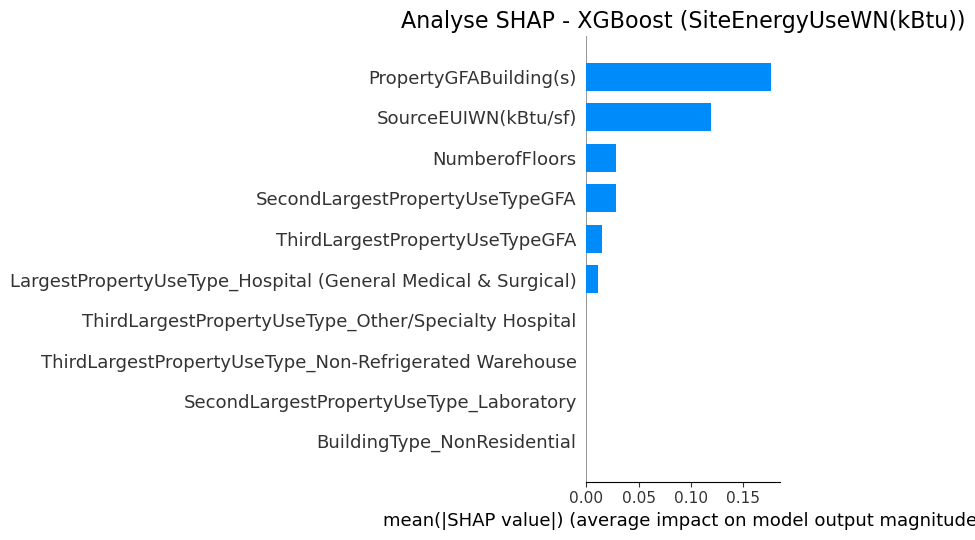

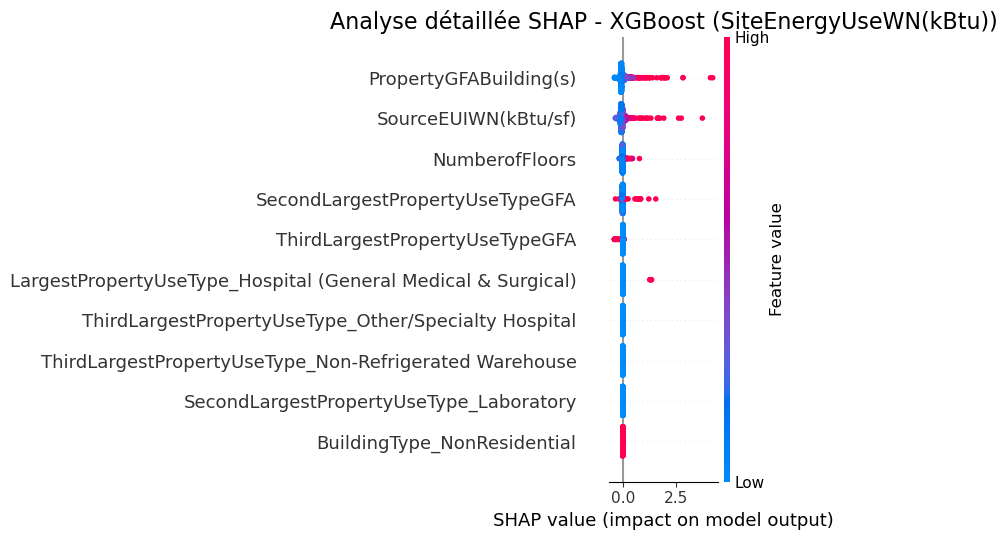

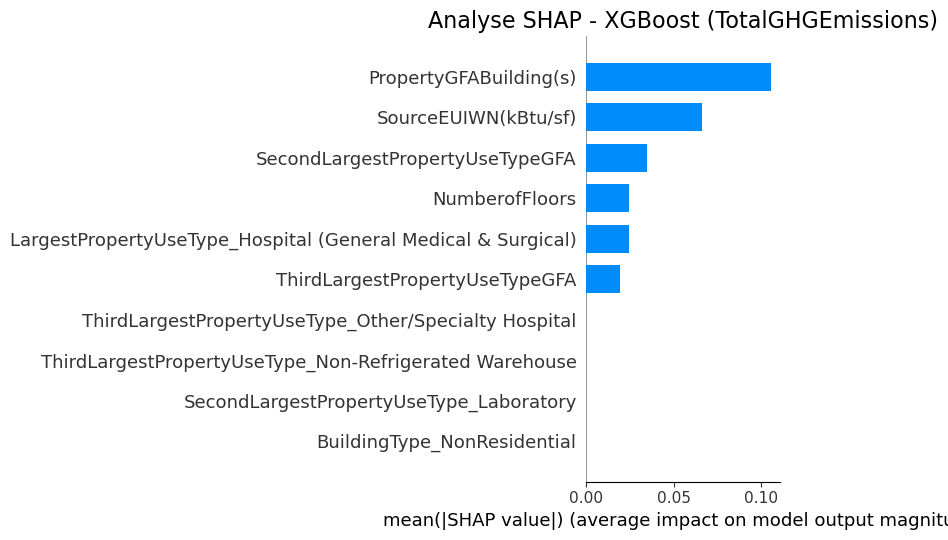

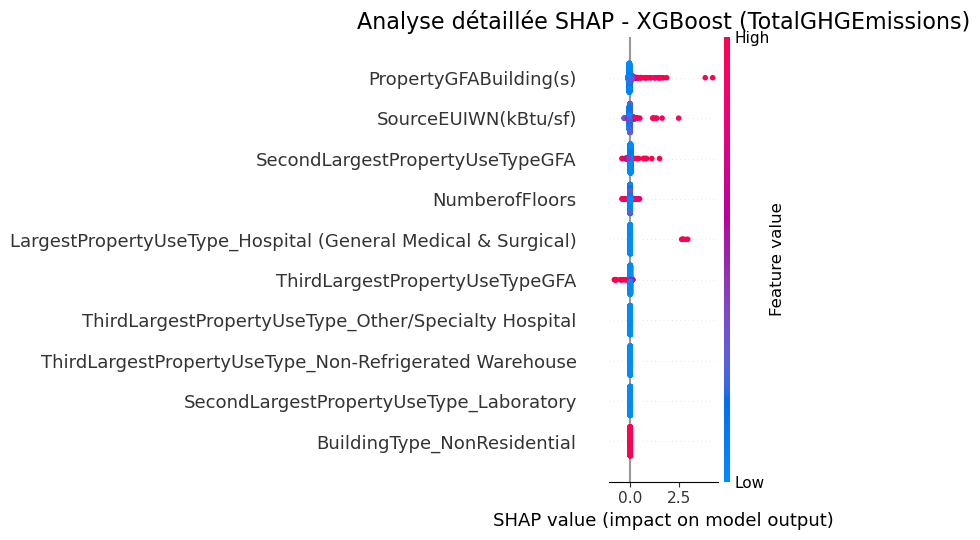

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
import shap

# --- Analyse de l'importance des caractéristiques pour les deux cibles --- 

# Meilleurs hyperparamètres optimisés par RandomizedSearchCV
best_params = {
    'subsample': 0.6,
    'reg_lambda': 10,
    'reg_alpha': 0.1,
    'n_estimators': 300,
    'min_child_weight': 5,
    'max_depth': 5,
    'learning_rate': 0.2,
    'gamma': 0.1,
    'colsample_bytree': 0.8
}

# Définir les deux cibles
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

# Initialiser une figure pour les graphiques d'importance
plt.figure(figsize=(14, 10))

for target_idx, target in enumerate(targets):
    # Entraîner un modèle XGBoost pour chaque cible
    xgb_model = XGBRegressor(**best_params, random_state=42)
    xgb_model.fit(X_train, y_train[:, target_idx])  # Entraîner pour chaque cible

    # Importance des caractéristiques avec XGBoost
    xgb_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    # Tracer l'importance des caractéristiques pour chaque cible
    plt.subplot(1, 2, target_idx + 1)
    plt.barh(xgb_importance['Feature'], xgb_importance['Importance'], color='lightblue')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Caractéristiques', fontsize=12)
    plt.title(f'Importance des caractéristiques - XGBoost ({target})', fontsize=14)
    plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher les caractéristiques les plus importantes en haut

plt.tight_layout()  # Ajuster l'espacement des graphiques
plt.show()

# --- Analyse SHAP pour chaque modèle --- 

# Initialiser le SHAP Explainer pour chaque modèle
for target_idx, target in enumerate(targets):
    # Entraîner un modèle XGBoost pour chaque cible
    xgb_model = XGBRegressor(**best_params, random_state=42)
    xgb_model.fit(X_train, y_train[:, target_idx])

    # SHAP pour XGBoost
    xgb_explainer = shap.Explainer(xgb_model, X_train)
    shap_values_xgb = xgb_explainer(X_train)

    # Graphique de résumé SHAP pour chaque cible
    plt.figure(figsize=(15, 10))
    shap.summary_plot(shap_values_xgb, X_train, plot_type='bar', show=False)
    plt.title(f'Analyse SHAP - XGBoost ({target})', fontsize=16)
    plt.tight_layout()  # Ajuster l'espace entre les éléments
    plt.show()

    # Graphique de résumé détaillé avec nuages de points
    plt.figure(figsize=(15, 10))
    shap.summary_plot(shap_values_xgb, X_train, show=False)
    plt.title(f'Analyse détaillée SHAP - XGBoost ({target})', fontsize=16)
    plt.tight_layout()
    plt.show()


# 8) prédiction individuelle: 

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# --- Comparaison des prédictions avec les valeurs réelles (nuage de points) --- 

# Prédictions du modèle sur les données d'entraînement
y_pred_site_energy = xgb_model.predict(X_train)  # Prédictions pour SiteEnergyUseWN(kBtu)
y_pred_ghg_emissions = xgb_model.predict(X_train)  # Prédictions pour TotalGHGEmissions

# Valeurs réelles pour les deux cibles
y_true_site_energy = y_train[:, 0]  # Valeurs réelles pour SiteEnergyUseWN(kBtu)
y_true_ghg_emissions = y_train[:, 1]  # Valeurs réelles pour TotalGHGEmissions

# Création de la figure pour les deux cibles
plt.figure(figsize=(14, 6))

# Subplot 1 : Nuage de points pour "SiteEnergyUseWN(kBtu)"
plt.subplot(1, 2, 1)
plt.scatter(y_true_site_energy, y_pred_site_energy, color='blue', alpha=0.6)
plt.plot([min(y_true_site_energy), max(y_true_site_energy)], 
         [min(y_true_site_energy), max(y_true_site_energy)], 
         color='red', linestyle='--')  # Ligne x=y
plt.xlabel('Valeurs réelles (SiteEnergyUseWN(kBtu))', fontsize=12)
plt.ylabel('Prédictions (SiteEnergyUseWN(kBtu))', fontsize=12)
plt.title('Nuage de points pour SiteEnergyUseWN(kBtu)', fontsize=14)

# Subplot 2 : Nuage de points pour "TotalGHGEmissions"
plt.subplot(1, 2, 2)
plt.scatter(y_true_ghg_emissions, y_pred_ghg_emissions, color='green', alpha=0.6)
plt.plot([min(y_true_ghg_emissions), max(y_true_ghg_emissions)], 
         [min(y_true_ghg_emissions), max(y_true_ghg_emissions)], 
         color='red', linestyle='--')  # Ligne x=y
plt.xlabel('Valeurs réelles (TotalGHGEmissions)', fontsize=12)
plt.ylabel('Prédictions (TotalGHGEmissions)', fontsize=12)
plt.title('Nuage de points pour TotalGHGEmissions', fontsize=14)

# Ajuster l'espacement
plt.tight_layout()
plt.show()
